In [ ]:
!pip install git+https://github.com/thierrymoudiki/scikit-survival --upgrade --no-cache-dir

In [ ]:
!pip install lifelines

from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()

In [25]:
import pandas as pd

def _encode_categorical_columns(df, categorical_columns=None):
    """
    Automatically identifies categorical columns and applies one-hot encoding.

    Parameters:
    - df (pd.DataFrame): The input DataFrame with mixed continuous and categorical variables.
    - categorical_columns (list): Optional list of column names to treat as categorical.

    Returns:
    - pd.DataFrame: A new DataFrame with one-hot encoded categorical columns.
    """
    # Automatically identify categorical columns if not provided
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Apply one-hot encoding to the identified categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    # Convert boolean columns to integer (0 and 1)
    bool_columns = df_encoded.select_dtypes(include=['bool']).columns.tolist()
    df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

    return df_encoded


In [30]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500, load_gbsg2, load_veterans_lung_cancer
from sksurv.ensemble import ComponentwiseGenGradientBoostingSurvivalAnalysis
from sksurv.custom import SurvivalCustom
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.svm import FastSurvivalSVM
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_veterans_lung_cancer()
X = _encode_categorical_columns(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
estimator = ComponentwiseGenGradientBoostingSurvivalAnalysis(regr = RidgeCV(), loss="coxph")
estimator2 = ComponentwiseGenGradientBoostingSurvivalAnalysis(regr = ExtraTreeRegressor(), loss="coxph")
estimator3 = ComponentwiseGenGradientBoostingSurvivalAnalysis(regr = KernelRidge(), loss="coxph")
estimator4 = ComponentwiseGenGradientBoostingSurvivalAnalysis(regr = ElasticNetCV(), loss="coxph")
estimator5 = SurvivalCustom(regr = RidgeCV())
estimator6 = SurvivalCustom(regr = RandomForestRegressor())
estimator7 = GradientBoostingSurvivalAnalysis()

estimator.fit(X_train, y_train)
estimator2.fit(X_train, y_train)
estimator3.fit(X_train, y_train)
estimator4.fit(X_train, y_train)
estimator5.fit(X_train, y_train)
estimator6.fit(X_train, y_train)
estimator7.fit(X_train, y_train)

100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


GradientBoostingSurvivalAnalysis()

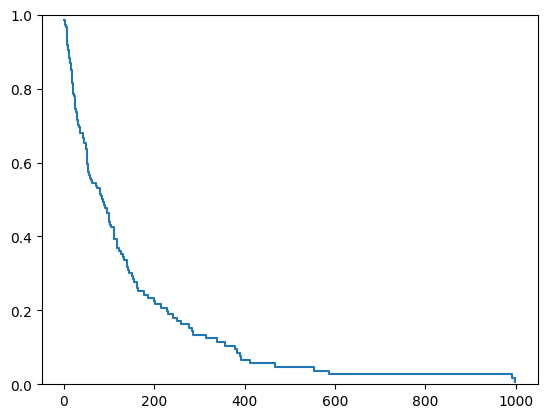

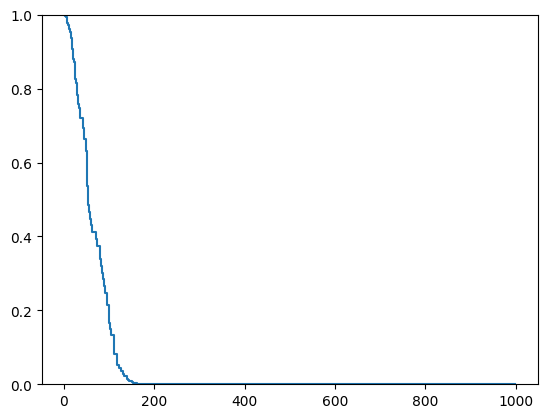

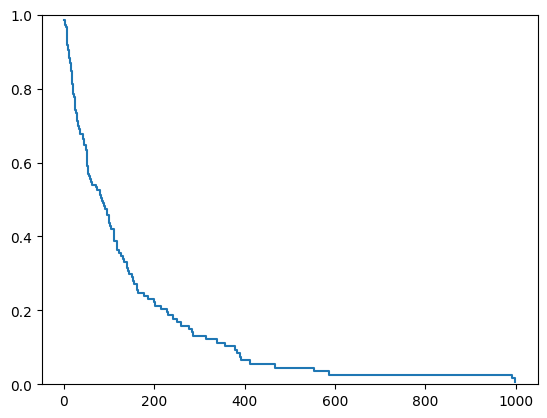

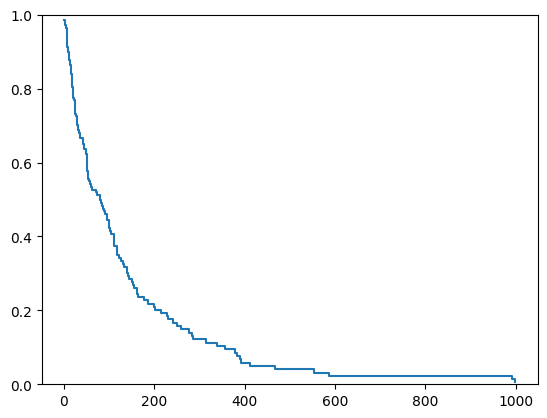

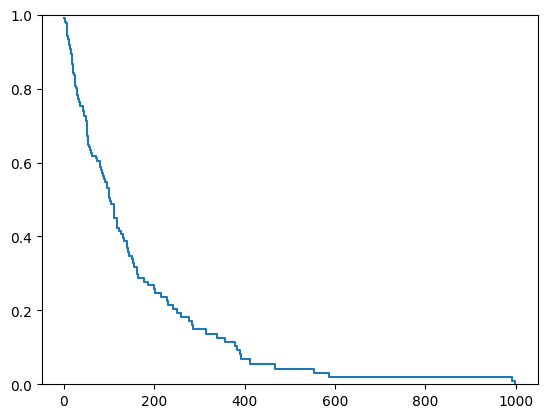

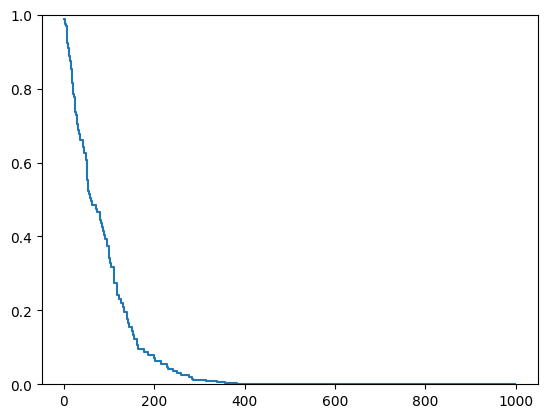

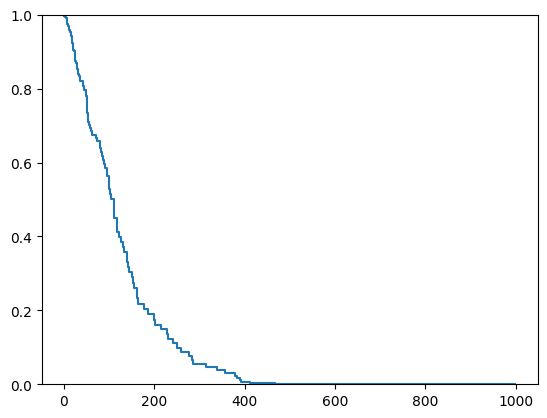

In [28]:
surv_funcs = estimator.predict_survival_function(X.iloc[:1])
surv_funcs2 = estimator2.predict_survival_function(X.iloc[:1])
surv_funcs3 = estimator3.predict_survival_function(X.iloc[:1])
surv_funcs4 = estimator4.predict_survival_function(X.iloc[:1])
surv_funcs5 = estimator5.predict_survival_function(X.iloc[:1])
surv_funcs6 = estimator6.predict_survival_function(X.iloc[:1])
surv_funcs7 = estimator7.predict_survival_function(X.iloc[:1])

for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()

for fn in surv_funcs2:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()

for fn in surv_funcs3:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()

for fn in surv_funcs4:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()

for fn in surv_funcs5:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()

for fn in surv_funcs6:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()

for fn in surv_funcs7:
    plt.step(fn.x, fn(fn.x), where="post")
    plt.ylim(0, 1)
    plt.show()